# Preparando o ambiente

Primeiro vamos importar algumas bibliotecas 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import display, HTML
CSS = """
    .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

Agora faremos a leitura das tabelas e as salvaremos em variaveis

In [48]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Vamos comparar os tamanhos das tabelas de treino e teste. Além da diferença de entradas, temos um 'feature' a menos no dataframe de teste, esta coluna é referente aoa tributo que queremos prever, 'Survived'.

In [26]:
print('The dimensions of trainning data: {}'.format(train.shape))
print('The dimensions of test data: {}'.format(test.shape))

The dimensions of trainning data: (891, 12)
The dimensions of test data: (418, 11)


In [61]:
display("Train",train['Sex'].value_counts())
display("Test",train['Survived'].value_counts())

'Train'

male      577
female    314
Name: Sex, dtype: int64

'Test'

0    549
1    342
Name: Survived, dtype: int64

Abaixo notamos que faltam alguns valores referente às colunas 'Age' (tamanho=714) e 'Cabin' (204).

In [64]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

Podemos confirmar os dados ausentes usando as funções *isnull()* e *sum()*.

In [68]:
display('Training', train.isnull().sum())
display('Test', test.isnull().sum())

'Training'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Test'

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

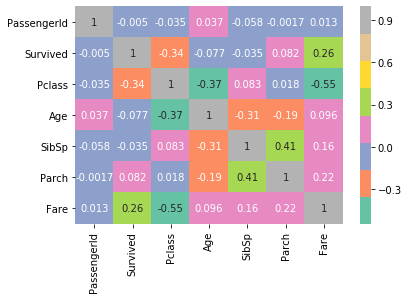

In [75]:
g = sns.heatmap(train.corr(method='pearson'), annot=True, cmap=sns.color_palette("Set2") )

Agora vamos escrever uma função que gera um *barplot* relacionando a quantidade de sobreviventes e mortos com um outro atributo qualquer da tabela. Após separarmos sobreviventes dos mortos, organizamos essa informação em novo dataframe (df). Agora basta passar o atributo desejado como argumento da função bar_chart() e obteremos um gráfico de barras.

In [89]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
    df.plot(kind='bar', stacked=True, colormap='Set2')

Notamos que a proporção de sobreviventes do sexo masculino é menor que a de sobreviventes do sexo feminino.

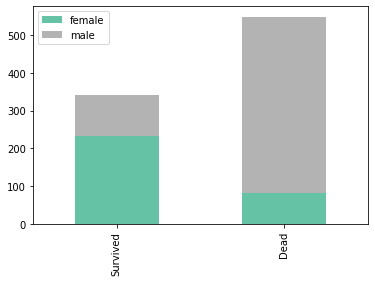

In [91]:
bar_chart('Sex')

Notamos que os viajantes em cabines de Primeira Classe (1) sobreviveram mais que os demais.
Notamos que os sobrevventes em cabines de Segunda Classe (2) sobreviveram mais que os de Terceira Classe (3).

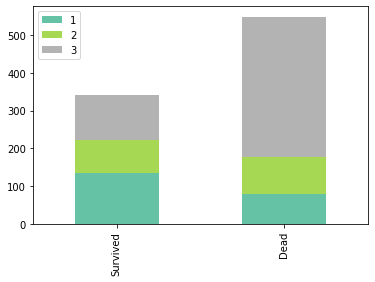

In [93]:
bar_chart('Pclass')

In [ ]:
g = sns.swarmplot(x="Survived", y="Age", hue='Pclass', data=train, palette=sns.color_palette("Set2"))

In [95]:
g = sns.swarmplot(x="Survived", y="Age", hue='Sex', data=train, palette=sns.color_palette("Set2"))

numpy.float64